## Importing Functions ##

In [1]:
# Importing the functions 

import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from matplotlib import _api, cbook
from matplotlib import transforms as mtransforms
import seaborn as sns 
from scipy.stats import genextreme
import scipy.stats as stats
import statsmodels.api as sm
import pylab
np.set_printoptions(threshold=sys.maxsize)
%matplotlib inline 

## Importing and Cleaning the Data ## 

In [2]:
df = pd.read_csv("HadESP_daily_totals.txt" , delim_whitespace=True, skiprows = 4)

In [3]:
# Scotland Daily Precipitation from 1931 - 2023

print(df)
type(df)

             Date  Value
0      1931-01-01   4.01
1      1931-01-02   0.80
2      1931-01-03   1.41
3      1931-01-04   1.20
4      1931-01-05   0.10
...           ...    ...
33768  2023-06-15   0.00
33769  2023-06-16   0.00
33770  2023-06-17   0.00
33771  2023-06-18  15.11
33772  2023-06-19   0.51

[33773 rows x 2 columns]


pandas.core.frame.DataFrame

In [4]:
# Changing to time series 

df_date = pd.to_datetime(df["Date"])

In [5]:
df_date

0       1931-01-01
1       1931-01-02
2       1931-01-03
3       1931-01-04
4       1931-01-05
           ...    
33768   2023-06-15
33769   2023-06-16
33770   2023-06-17
33771   2023-06-18
33772   2023-06-19
Name: Date, Length: 33773, dtype: datetime64[ns]

## Question 1 Data Preperation Monthly Maxima ##

In [6]:
## Using for loops to get the data into months and years 

#Ignoring a certain warning

import warnings
warnings.filterwarnings("ignore")

# creating a list to put our year/month data  

all_maxima = [] 

for i in np.arange(1931,2023): 
    subset_data = df[df_date.dt.year == i] # subsetting to all years
    monthly_maxima = [] # creating list for monthly maxima over each year
    for j in np.arange(1,13):
        month = subset_data[df_date.dt.month == j]["Value"] #subsetting to all months
        monthly_maxima.append(np.amax(month)) # adding the maxium 
    all_maxima.append(monthly_maxima)
    
all_maxima = np.array(all_maxima)
print(all_maxima.shape)

(92, 12)


In [7]:
# This is a data set of all the monthly maxiums for each year 
# The rows are the year 1931-1932... 2023
# The columns are the Month Jan, Feb .. Dec 

#print(all_maxima)

## Question 2: Monthly Cycles through a 92 year period ##

In [8]:
# Trying to understand data
# By transposing we are getting all the rows to be the month and columns to be the year 

all_maxima_t = np.transpose(all_maxima) 

print(all_maxima_t)

[[14.75 11.23 12.8   5.79  6.98 19.02 13.82 11.7  14.49  6.54 11.58 15.25
   8.63  9.39 14.41  9.54 12.7  10.31  8.91  8.62 10.18  9.13  4.62  9.38
   4.31 10.57 12.77  8.78  9.33 14.    9.87 18.08  6.48  4.27 14.78  5.88
  17.32 12.98 14.38 11.93 10.92 10.19 11.2  12.38 12.4  18.14 15.62 28.06
   7.5  14.3   6.81 15.12  8.38 16.44 20.37  8.78  7.38 28.77 10.47 18.02
  13.87 21.66 15.36 10.7  11.08  3.3   5.53 15.48  9.71 11.54  7.79 17.52
  10.52 18.32 20.95  4.82  8.18 12.2   7.05  8.84  8.03 11.44  9.68 12.38
   8.98 27.55 11.43 14.02  7.97  7.34 13.38  6.56]
 [ 7.95  1.31 15.68  3.12  7.31 10.56 13.07  5.92 10.13  9.63  9.9  11.12
  14.5   7.98 12.5  11.6   8.22  8.4   8.52 14.9  16.2   7.12 10.07  9.84
   8.59  7.7   7.2   9.79  2.83 10.5   6.79 16.63  9.5  11.34  3.77 11.12
  15.72  6.3  10.72 18.9   6.23 12.42  4.4  12.62  5.5   8.1  21.12 18.48
   4.52  9.83  8.31  6.58  8.52  8.33  4.28  4.75 18.86  8.53 14.31 13.85
  13.39  7.84  3.84 17.79 13.42 12.45 11.77 15.94  5.84  5.13

In [9]:
# Trying to understand slicing 
# Left side seems to be the row, right seems to be the columns?

print(all_maxima_t [0, :])

[14.75 11.23 12.8   5.79  6.98 19.02 13.82 11.7  14.49  6.54 11.58 15.25
  8.63  9.39 14.41  9.54 12.7  10.31  8.91  8.62 10.18  9.13  4.62  9.38
  4.31 10.57 12.77  8.78  9.33 14.    9.87 18.08  6.48  4.27 14.78  5.88
 17.32 12.98 14.38 11.93 10.92 10.19 11.2  12.38 12.4  18.14 15.62 28.06
  7.5  14.3   6.81 15.12  8.38 16.44 20.37  8.78  7.38 28.77 10.47 18.02
 13.87 21.66 15.36 10.7  11.08  3.3   5.53 15.48  9.71 11.54  7.79 17.52
 10.52 18.32 20.95  4.82  8.18 12.2   7.05  8.84  8.03 11.44  9.68 12.38
  8.98 27.55 11.43 14.02  7.97  7.34 13.38  6.56]


In [10]:
# Finding the basics statitsics for each month 1931-2023

# Initialising Lists for max, min, mean and std

a = all_maxima_t
maxiums = []
miniums = []
means = []
medians = []
std_dev = []
Range = np.subtract(maxiums, miniums)
 
# finding max, min, mean and std with a loop

for p in a:
    maxiums.append(max(p))
 
for c in a:
    miniums.append(min(c))
    
for d in a:
    means.append(np.mean(d))
    
for e in a:
    std_dev.append(np.std(e))

for f in a:
    medians.append(np.median(f))
    
# printing the list to check them

#print(maxiums)
#print(miniums)
#print(means)
#print(medians)
#print(std_dev)

# Define labels, positions, bar heights and error bar heights


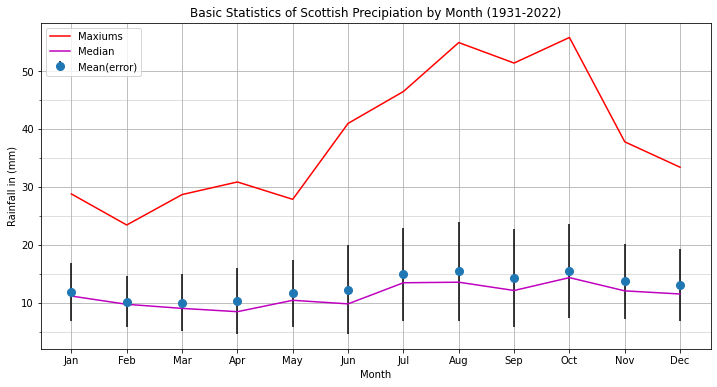

In [11]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.linspace(0,12,12), months)
x = np.linspace(0,12,12)
y = means 
yerr = std_dev

major_tick = [10, 20, 30, 40, 50]
minor_tick = [5, 15, 25, 35, 45]
ax.set_yticks(major_tick) # Grid
ax.set_yticks(minor_tick, minor=True)

ax.grid(which='both')

ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=1)

plt.plot(x, maxiums, label = 'Maxiums' , color = 'r')
plt.plot(x, medians, label = 'Median' , color = 'm' )
#plt.plot(miniums, label = 'Miniums')
plt.errorbar(x, y , yerr=yerr, ecolor = 'black' , label='Mean(error)', fmt='o', markersize=8)
plt.legend(loc='upper left')

plt.xlabel("Month")
plt.ylabel("Rainfall in (mm)")
plt.title("Basic Statistics of Scottish Precipiation by Month (1931-2022)")
plt.savefig("Basic Statistics of Scottish Precipiation by Month (1931-2022)")

plt.show()

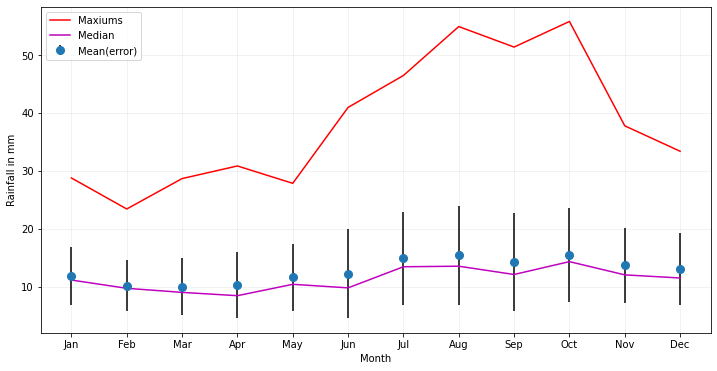

In [12]:
# Creating a graph 

plt.figure(figsize=(12,6))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.linspace(0,12,12), months)
x = np.linspace(0,12,12)
y = means 
yerr = std_dev

plt.plot(x, maxiums, label = 'Maxiums' , color = 'r')
plt.plot(x, medians, label = 'Median' , color = 'm' )
#plt.plot(miniums, label = 'Miniums')
plt.errorbar(x, y , yerr=yerr, ecolor = 'black' , label='Mean(error)', fmt='o', markersize=8)
plt.legend(loc='upper left')

plt.xlabel("Month")
plt.ylabel("Rainfall in mm")
plt.grid(which='major', alpha=0.2)

plt.show()


## Question 3: Splitting into Seasons and finiding seasonal maxiums ##

In [13]:
# This is a transpose of data set of all the monthly maxiums for each year 
# The columns are the year 1931-1932... 2023
# The rows are the Month Jan, Feb .. Dec 

# As such we have 12 lists of 92 values for each month, the reasons it doesn't look nice is it's too big

#print(np.shape(all_maxima_t))
#print(all_maxima_t)

In [14]:
# Creating our Cold dataset May-Oct

# Trying to understand slicing 
# Left side seems to be the row, right seems to be the columns?
# start:end:step 

# Slice of the original data to get colder months 

Jan_Apr_data = all_maxima_t [0:4, :]
Nov_Dec_data = all_maxima_t [10:12, :]

# Checking them 


In [15]:
# Looking a shape of colder month arrays 

print(np.shape(Jan_Apr_data))
print(np.shape(Nov_Dec_data))

# Creating an array of zeros to try allow the combination of colder month arrays 

#array_2d = np.zeros((2, 92))
#print(np.shape(array_2d))
#print(array_2d)

# Trying to combine my zeros to create same sized arrays

# Wee_Zeros = np.concatenate((Nov_Dec_data, array_2d), axis=1)
# print(Wee_Zeros)
# print(np.shape(Wee_Zeros))

# Trying to combine but concatenate function 

Cold_season = np.concatenate((Nov_Dec_data, Jan_Apr_data), axis = 0 )
print(np.shape(Cold_season))

Cold_season_t = np.transpose(Cold_season)
#print(Cold_season_t)

# Looking at the cold seasons transpose shape 

#print(Cold_season_t)
#print(all_maxima_t)

(4, 92)
(2, 92)
(6, 92)


In [16]:
# Finding the basics statitsics for Cold_season

# Initialising Lists for max, min, mean and std

a = Cold_season_t
maxiums_cold = []
miniums_cold = []
means_cold  = []
medians_cold = []
std_dev_cold = []
Range_cold = np.subtract(maxiums_cold, miniums_cold)
 
# finding max, min, mean and std with a loop

for p in a:
    maxiums_cold.append(max(p))
 
for c in a:
    miniums_cold.append(min(c))
    
for d in a:
    means_cold.append(np.mean(d))
    
for e in a:
    std_dev_cold.append(np.std(e))

for f in a:
    medians_cold.append(np.median(f))
    
# printing the list to check them

#print(np.shape(maxiums_cold))
#print(miniums_cold)
#print(means_cold)
#print(medians_cold)
#print(std_dev_cold)

# Define labels, positions, bar heights and error bar heights


In [17]:
# Trying to create a list of 1931 - 2023 for my plot

# with integers within given range
  
def createList(r1, r2):
    return list(range(r1, r2+1, 4))
     
# Driver Code

r1, r2 = 1931, 2023

Years = (createList(r1, r2))

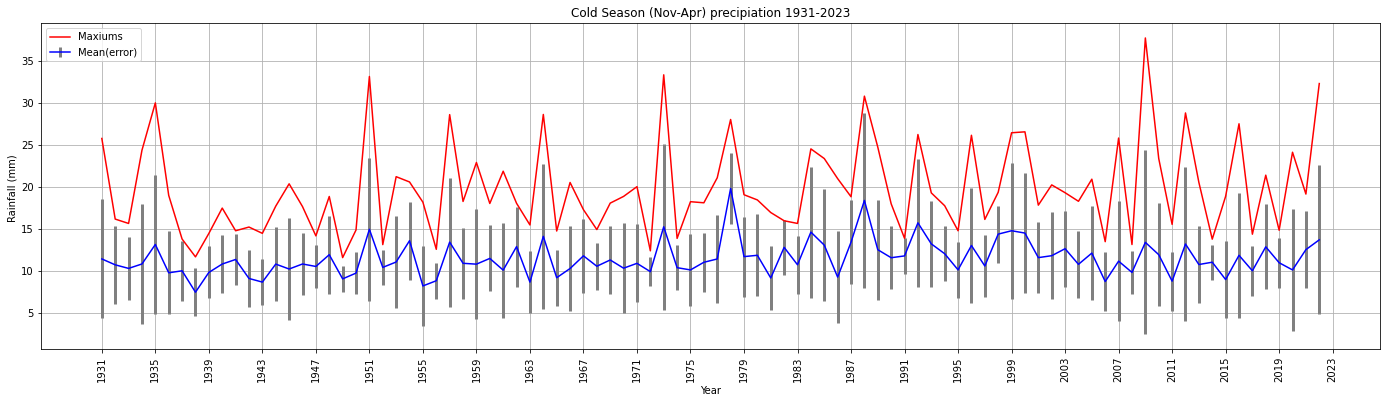

In [18]:
# Creating a graph 

plt.figure(figsize=(24,6))
plt.xticks(np.arange(0,93,4), Years,  rotation=90)
x = np.arange(0,92)
y = maxiums_cold
yerr = std_dev_cold

plt.plot(x, y, label = 'Maxiums' , color = 'r')
#plt.plot(x, medians_cold, label = 'Median' , color = 'm' )
#plt.plot(miniums_cold, label = 'Miniums')
plt.errorbar(x, means_cold , yerr=yerr , label='Mean(error)', ecolor='grey', elinewidth=3, fmt = 'b')
plt.legend(loc='upper left')

plt.xlabel("Year")
plt.ylabel("Rainfall (mm) ")
plt.title("Cold Season (Nov-Apr) precipiation 1931-2023")
plt.grid()

plt.savefig("Cold_Seasons")
plt.show()

In [19]:
# Creating our Warm dataset May-Oct

May_Oct_data = all_maxima_t [4:10, :]

# print(May_Oct_data)

In [20]:
# Looking a shape of warmer month array

print(np.shape(May_Oct_data))

Warm_season_t = np.transpose(May_Oct_data)

# Looking at the Warm seasons transpose shape 

print(np.shape(Warm_season_t))

# checking things 

#print(Warm_season_t)

(6, 92)
(92, 6)


In [21]:
# Finding the basics statitsics for Warm_season

# Initialising Lists for max, min, mean and std

z = Warm_season_t
maxiums_warm = []
miniums_warm = []
means_warm  = []
medians_warm = []
std_dev_warm = []
Range_warm = np.subtract(maxiums_cold, miniums_cold)
 
# finding max, min, mean and std with a loop

for p in z:
    maxiums_warm.append(max(p))
 
for c in z:
    miniums_warm.append(min(c))
    
for d in z:
    means_warm.append(np.mean(d))
    
for e in z:
    std_dev_warm.append(np.std(e))

for f in z:
    medians_warm.append(np.median(f))
    
# printing the list to check them

print(maxiums_warm)
#print(miniums_warm)
#print(means_warm)
#print(medians_warm)
#print(std_dev_warm)

# Define labels, positions, bar heights and error bar heights

[40.95, 16.75, 16.59, 24.1, 22.93, 14.02, 25.86, 19.74, 22.38, 25.3, 23.28, 26.84, 27.84, 17.22, 31.7, 16.79, 22.77, 23.2, 26.82, 29.38, 19.08, 12.44, 17.04, 24.85, 13.81, 43.18, 21.76, 42.2, 25.2, 31.92, 29.84, 19.3, 23.72, 21.52, 26.42, 39.23, 19.15, 22.24, 15.5, 46.46, 24.36, 11.7, 15.28, 12.22, 30.86, 25.92, 15.36, 24.34, 24.8, 19.75, 34.78, 38.7, 18.7, 22.78, 18.86, 22.68, 19.65, 15.87, 23.39, 22.52, 15.21, 13.82, 25.08, 13.34, 39.41, 16.1, 28.88, 31.04, 27.78, 21.35, 24.63, 33.65, 15.89, 31.71, 35.77, 20.59, 31.25, 20.26, 51.37, 31.33, 32.14, 24.92, 15.32, 54.91, 17.06, 25.95, 38.66, 19.62, 21.9, 55.79, 29.27, 24.99]


In [22]:
# Trying to create a list of 1931 - 2023 for my plot

# with integers within given range
  
def createList(r1, r2):
    return list(range(r1, r2+1, 4))
     
# Driver Code

r1, r2 = 1931, 2023

Years = (createList(r1, r2))

print(np.shape(Years))
print(Years)

(24,)
[1931, 1935, 1939, 1943, 1947, 1951, 1955, 1959, 1963, 1967, 1971, 1975, 1979, 1983, 1987, 1991, 1995, 1999, 2003, 2007, 2011, 2015, 2019, 2023]


In [23]:
print(np.shape(all_maxima_t))
print(np.shape(maxiums_warm))

(12, 92)
(92,)


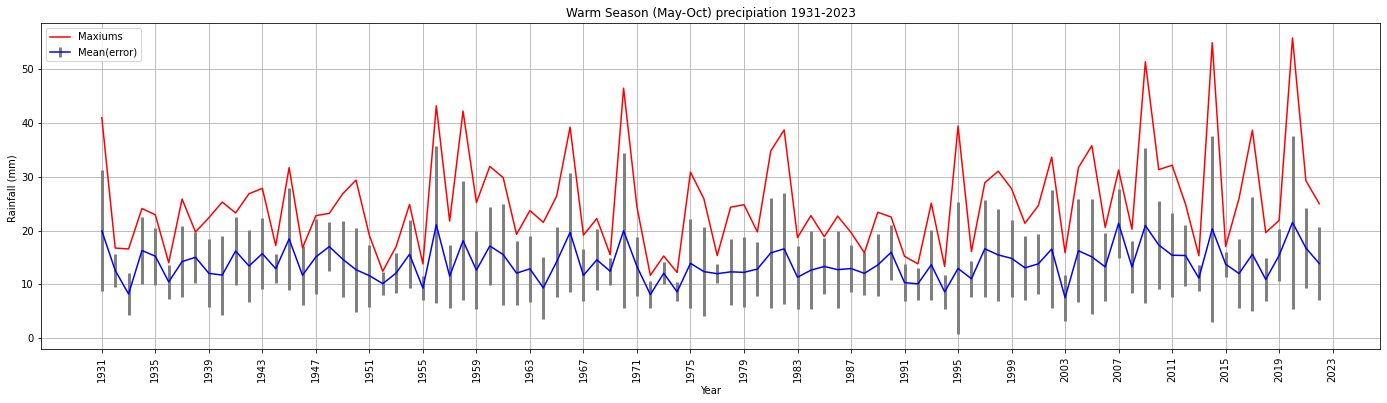

In [24]:
# Creating a graph 

plt.figure(figsize=(24,6))
plt.xticks(np.arange(0,93,4), Years,  rotation=90)
x = np.arange(0,92)
y = maxiums_warm
yerr = std_dev_warm

plt.plot(x, y, label = 'Maxiums' , color = 'r')
#plt.plot(x, maxiums_warm, label = 'MaxiumsMonth' , color = 'r')
#plt.plot(x, medians_cold, label = 'Median' , color = 'm' )
#plt.plot(miniums_cold, label = 'Miniums')
plt.errorbar(x, means_warm , yerr=yerr , label='Mean(error)', ecolor='grey', elinewidth=3, fmt = 'b')
plt.legend(loc='upper left')

plt.xlabel("Year")
plt.ylabel("Rainfall (mm) ")
plt.title("Warm Season (May-Oct) precipiation 1931-2023")
plt.grid()

plt.savefig("Warm_Seasons")
plt.show()

## Question 4: Producing the diagnositc plots and histograms ##

In [25]:
# Changing monthly maxium to correct shape from 1931-2022

arr = all_maxima

all_maxima_monthly = arr.reshape(-1)

# Checking it worked 

#print(all_maxima_monthly)
print(np.shape(all_maxima_monthly))

# Changeing monthly maxima array for Warm and cold seasons

arr1 = Warm_season_t
print(np.shape(Warm_season_t))
arr2 = Cold_season_t 
print(np.shape(Cold_season_t))

Warm_monthly_maxima = arr1.reshape(-1)
Cold_monthly_maxima = arr2.reshape(-1)

# Checking it worked

#print(np.shape(Warm_monthly_maxima))
#print(np.shape(Cold_monthly_maxima))

(1104,)
(92, 6)
(92, 6)


In [26]:
# Checking the data seems to be a mistake (fixed it partly)

#print(maxiums_warm)
#print(Warm_monthly_maxima)
#print(np.shape(maxiums_warm))
#print(np.shape(Warm_monthly_maxima))
#print(maxiums_warm.dtype)
#type(Warm_monthly_maxima.dtype)

#print(maxiums_cold)
#print(all_maxima)
#print(Cold_monthly_maxima)

#range_seasonal = np.max(maxiums_warm) - np.min(maxiums_warm)
#range_monthly = np.max(Warm_monthly_maxima) - np.min(Warm_monthly_maxima)

#print(range_seasonal)
#print(range_monthly)

## Trying to solve problem of ticks 

What I have come to realise is that the x axis of my two datasets are different; I have tried to join them on the y axis. By using ax.twiny(). This however has caused a problem of creating a strange 0-1 x and y tick. A tick is just the way that matplotlib marks data points on an axis. To set them to be invisible on a joined axis subplot we can use the bit of code ax.set_xticks([]) or ax.set_yticks([]). Another feature I want to get my head around is ax.tick_params() which seemingly allows us to alter the ticks, the gridlines and tick labels. 

Example of ax.twinx() https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py

Example of ax.set_xticks() https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html

Example of ax.tick_params() https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html

Below I have removed all the fluff of the set.ticks and tick.paramters and let matplotlib take over. There are a few issues with this I want to try and solve. 

How can I change the base ticks of 0-1 on x and y to the precipitaiton values on y and the months for ax and years for ax2?

How can I set the spefic months and years for ax, ax2? 

How can I add nice gridlines?

The problem I am running into for the first part I think is about how matplotlib configures the joining of the Y axis as the X axis are also different. I want to try look into the functoin linear locator. This function is an automatic tick function. I'm really struggling to fix this image however I'm close to an accurate image I do just need to remove the scales now.  

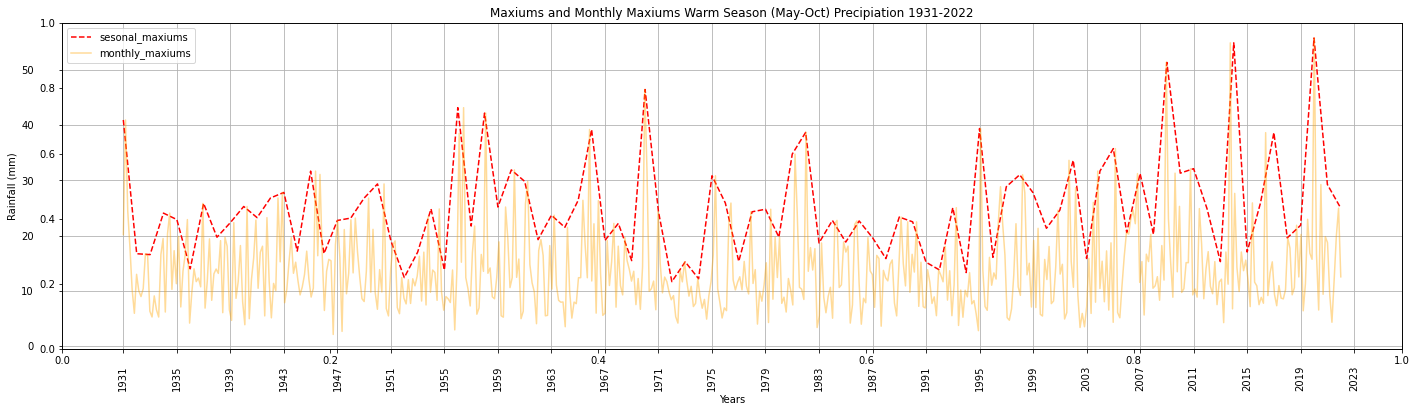

In [27]:
# Creating a plot to compare monthly and seasonal changes from 1931 to 2022

x_warm = np.arange(0,92)
y_warm = maxiums_warm

x_warm_monthly_max = np.arange(0,552)
y_warm_monthly_max = Warm_monthly_maxima

# Creating the figure and sub plots

fig=plt.figure(figsize=(24,6))

ax=fig.add_subplot(111, label="1")
plt.xticks(np.arange(0,93,4), Years,  rotation=90)
ax2=fig.add_subplot(111, label="3", frame_on=False)

# Creating monthly line one 

lns1 = ax.plot(x_warm, y_warm , color="red", label='sesonal_maxiums' , linestyle = '--')
ax.set_xlabel("Years", color="black")
ax.set_ylabel("Rainfall (mm)", color="black")
ax.tick_params(axis='y', colors="black", pad = 25)
ax.tick_params(axis='x', colors="black", pad = 12.5)
ax.grid()


# Connecting both lines to same y axis 

ax2 = ax.twiny()
#ax2 = ax.twinx()
#ax2= ax.twinx().twiny()

# Creating seasonal line two 

lns2 = ax2.plot(x_warm_monthly_max, y_warm_monthly_max , color="orange" , alpha = 0.4 , label='monthly_maxiums' )
ax2.set_xticks([])

# Creating the legend

leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax.legend(leg, labs, loc=0)


plt.title("Maxiums and Monthly Maxiums Warm Season (May-Oct) Precipiation 1931-2022")
plt.savefig("Warm_season_and_monthly_maxiums")
plt.show()

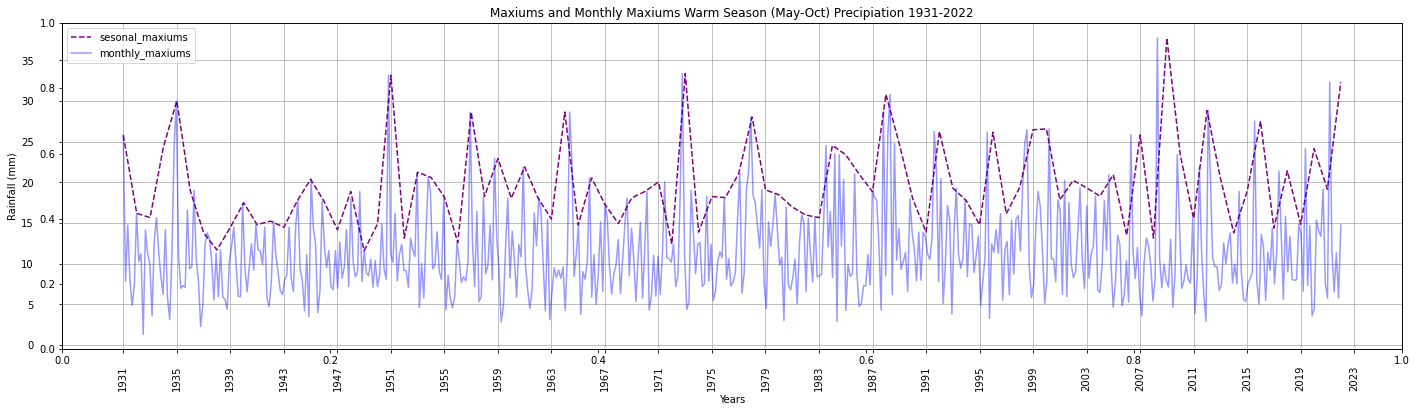

In [28]:
# Creating a plot to compare cold monthly and cold seasonal changes from 1931 to 2022

x_warm = np.arange(0,92)
y_warm = maxiums_cold

x_warm_monthly_max = np.arange(0,552)
y_warm_monthly_max = Cold_monthly_maxima

# Creating the figure and sub plots

fig=plt.figure(figsize=(24,6))

ax=fig.add_subplot(111, label="1")
plt.xticks(np.arange(0,93,4), Years,  rotation=90)
ax2=fig.add_subplot(111, label="3", frame_on=False)

# Creating monthly line one 

lns1 = ax.plot(x_warm, y_warm , color="purple", label='sesonal_maxiums' , linestyle = '--')
ax.set_xlabel("Years", color="black")
ax.set_ylabel("Rainfall (mm)", color="black")
ax.tick_params(axis='y', colors="black", pad = 25)
ax.tick_params(axis='x', colors="black", pad = 12.5)
ax.grid()


# Connecting both lines to same y axis 

ax2 = ax.twiny()
#ax2 = ax.twinx()
#ax2= ax.twinx().twiny()

# Creating seasonal line two 

lns2 = ax2.plot(x_warm_monthly_max, y_warm_monthly_max , color="blue" , alpha = 0.4 , label='monthly_maxiums' )
ax2.set_xticks([])

# Creating the legend

leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax.legend(leg, labs, loc=2)


plt.title("Maxiums and Monthly Maxiums Warm Season (May-Oct) Precipiation 1931-2022")
plt.savefig("Cold_season_and_monthly_maxiums")
plt.show()

(552,)


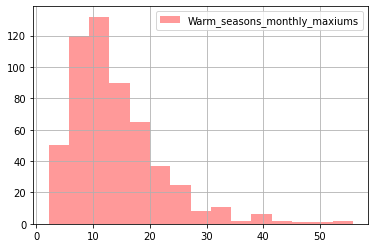

(552,)


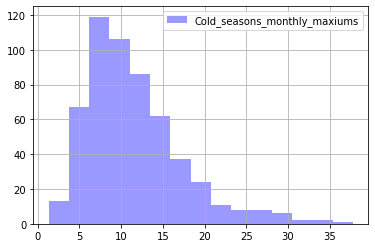

In [29]:
x_cold = Cold_monthly_maxima
x_warm = Warm_monthly_maxima

plt.hist(x_warm , bins = 15 , color="red", label='Warm_seasons_monthly_maxiums', alpha = 0.4)
print(np.shape(x_warm))
plt.grid()
plt.legend()
plt.show()

plt.hist(x_cold , bins = 15 , color="blue", label='Cold_seasons_monthly_maxiums', alpha = 0.4)
print(np.shape(x_cold))
plt.grid()
plt.legend()
plt.show()

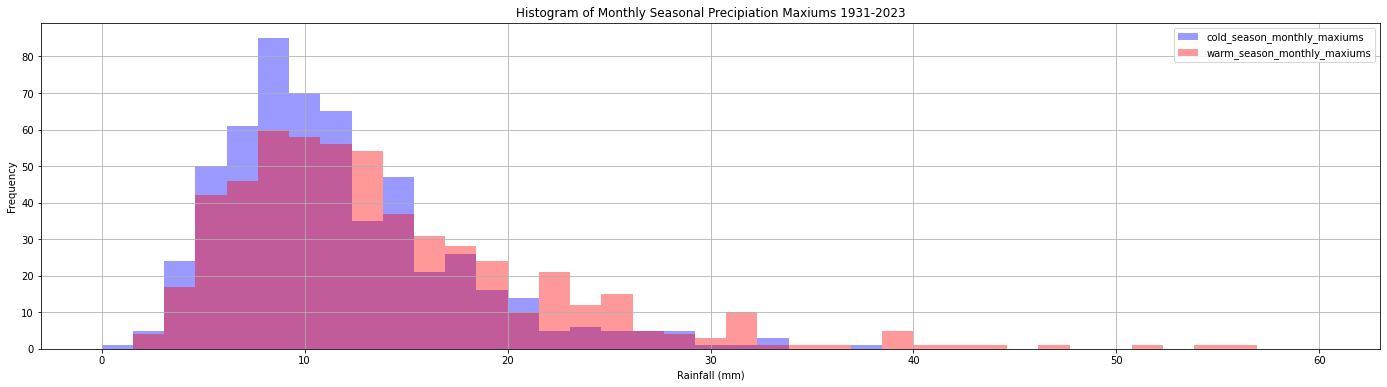

In [30]:
# Creating Histograms of the seasonal maxiums 
x_cold = Cold_monthly_maxima
x_warm = Warm_monthly_maxima
bins = np.linspace(0, 60, 40)

fig=plt.figure(figsize=(24,6))

plt.hist(x_cold, bins , color="b" ,label='cold_season_monthly_maxiums', alpha = 0.4)
plt.hist(x_warm , bins , color="r", label='warm_season_monthly_maxiums', alpha = 0.4)
ax.set_ylabel("Frequency", color="black")
ax.set_xlabel("Rainfall (mm)", color="black")


plt.grid()
plt.title("Histogram of Monthly Seasonal Precipiation Maxiums 1931-2023")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency", color="black")
plt.savefig("Cold_season_and_monthly_maxiums")
plt.style.use("default")
plt.legend(loc='upper right')
plt.savefig("Histogram comparision of Monthly Seasonal Precipiation Maxiums 1931-2023")
plt.show()

# Trying things out 

In [31]:
# Trying to see how two 45 years compare from the same seasons (warm)

First_45_warm = Warm_monthly_maxima [0:270]
Second_45_warm = Warm_monthly_maxima [282:552]

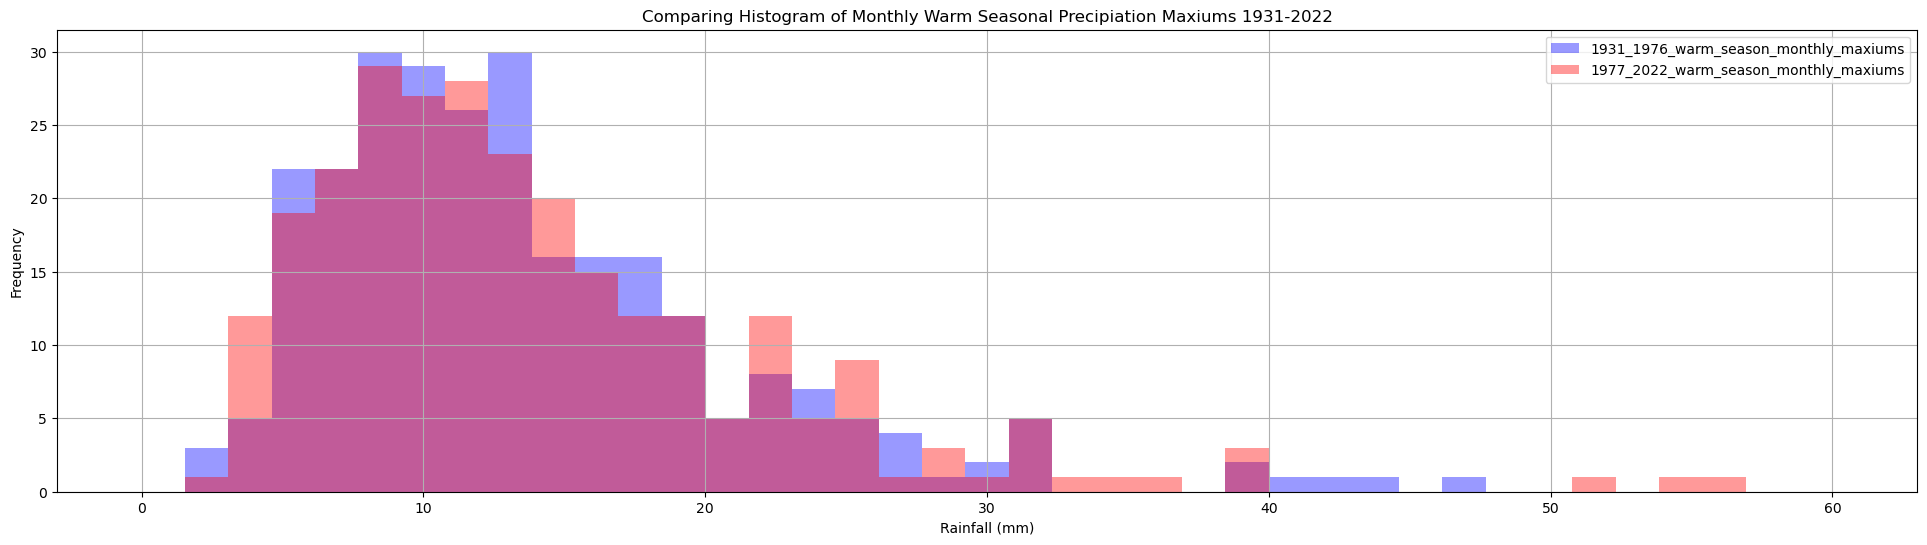

In [32]:
# Creating Histograms of the seasonal maxiums 
x_1931_1976_warm = First_45_warm
x_1977_2022_warm = Second_45_warm
bins = np.linspace(0, 60, 40)

fig=plt.figure(figsize=(24,6))

plt.hist(x_1931_1976_warm , bins , color="b" ,label='1931_1976_warm_season_monthly_maxiums', alpha = 0.4)
plt.hist(x_1977_2022_warm , bins , color="r", label='1977_2022_warm_season_monthly_maxiums', alpha = 0.4)
ax.set_ylabel("Frequency", color="black")
ax.set_xlabel("Rainfall (mm)", color="black")


plt.grid()
plt.title("Comparing Histogram of Monthly Warm Seasonal Precipiation Maxiums 1931-2022")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency", color="black")
plt.savefig("Cold_season_and_monthly_maxiums")
plt.style.use("default")
plt.legend(loc='upper right')
plt.savefig("Comparision of Monthly Warm Seasonal Precipiation Maxiums old and new")
plt.show()

# Trying things out 

In [33]:
# Trying to see how two 45 years compare from the different seasons (cold)

First_45_cold = Cold_monthly_maxima [0:270]
Second_45_cold = Cold_monthly_maxima [282:552]

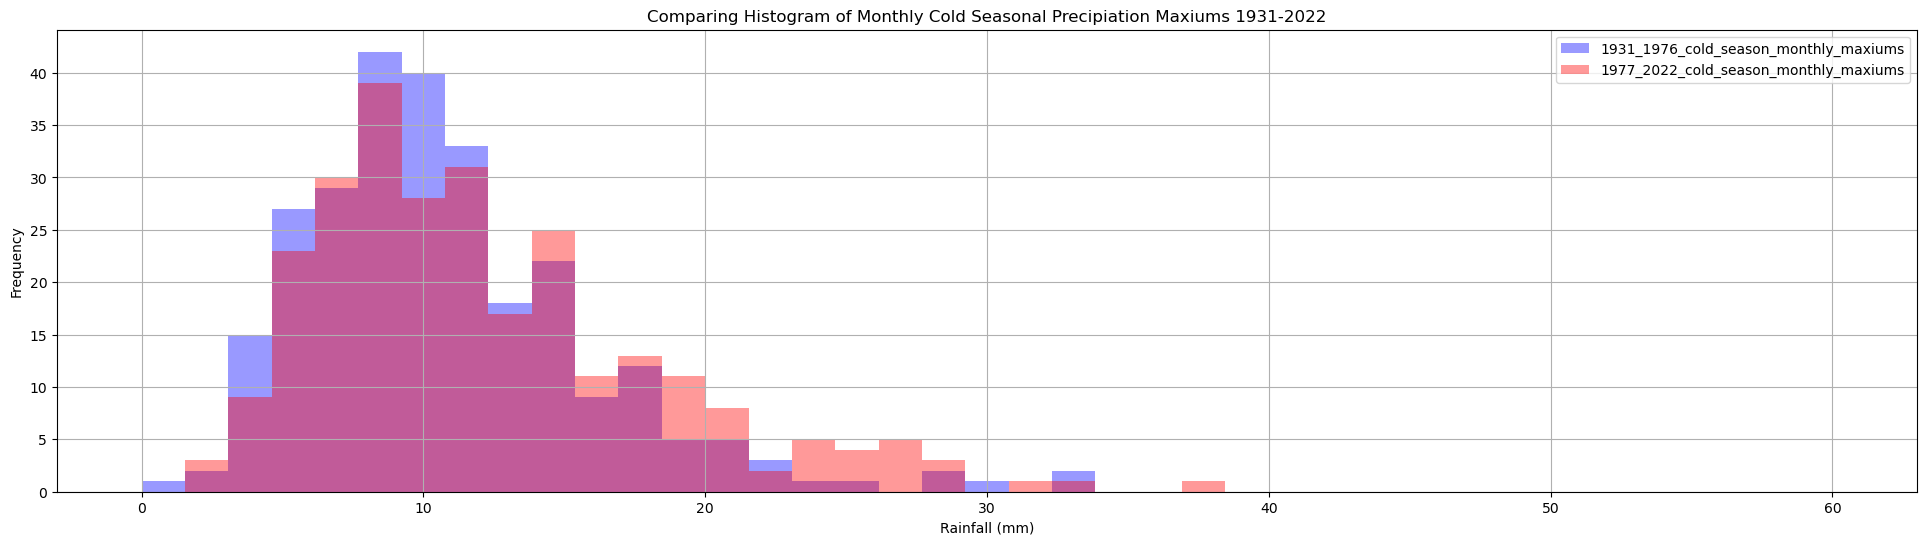

In [34]:
# Creating Histograms of the seasonal maxiums 
x_1931_1976_cold = First_45_cold
x_1977_2022_cold = Second_45_cold
bins = np.linspace(0, 60, 40)

fig=plt.figure(figsize=(24,6))

plt.hist(x_1931_1976_cold, bins , color="b" ,label='1931_1976_cold_season_monthly_maxiums', alpha = 0.4)
plt.hist(x_1977_2022_cold , bins , color="r", label='1977_2022_cold_season_monthly_maxiums', alpha = 0.4)
ax.set_ylabel("Frequency", color="black")
ax.set_xlabel("Rainfall (mm)", color="black")


plt.grid()
plt.title("Comparing Histogram of Monthly Cold Seasonal Precipiation Maxiums 1931-2022")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency", color="black")
plt.savefig("Cold_season_and_monthly_maxiums")
plt.style.use("default")
plt.legend(loc='upper right')
plt.savefig("Comparision of Monthly cold Seasonal Precipiation Maxiums old and new")
plt.show()

# Trying things out 

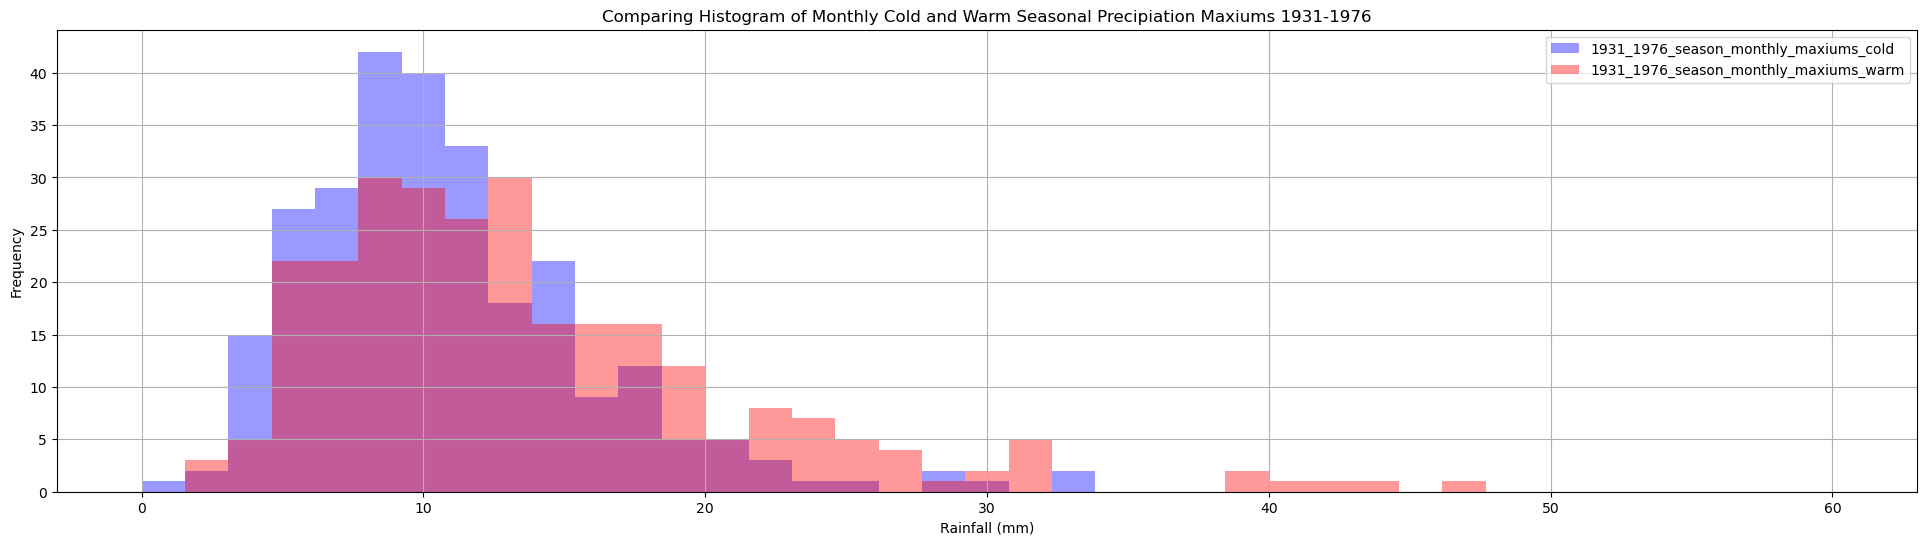

In [35]:
# Creating Histograms of the seasonal maxiums 

bins = np.linspace(0, 60, 40)

fig=plt.figure(figsize=(24,6))

plt.hist(x_1931_1976_cold, bins , color="b" ,label='1931_1976_season_monthly_maxiums_cold', alpha = 0.4)
plt.hist(x_1931_1976_warm , bins , color="r", label='1931_1976_season_monthly_maxiums_warm', alpha = 0.4)


ax.set_ylabel("Frequency", color="black")
ax.set_xlabel("Rainfall (mm)", color="black")


plt.grid()
plt.title("Comparing Histogram of Monthly Cold and Warm Seasonal Precipiation Maxiums 1931-1976")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency", color="black")
plt.savefig("Cold_season_and_monthly_maxiums")
plt.style.use("default")
plt.legend(loc='upper right')
plt.savefig("Comparision of Monthly Warm and Cold Seasonal Precipiation Maxiums old")
plt.show()

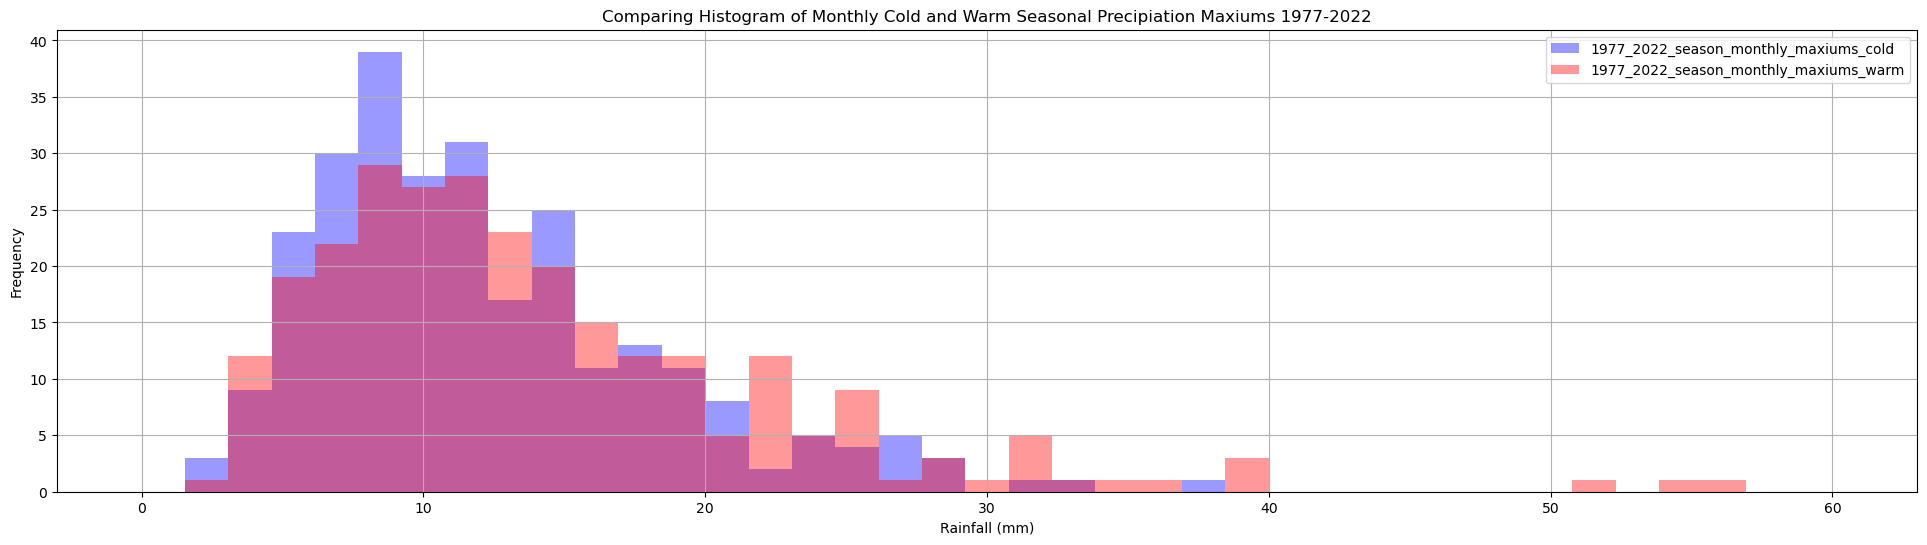

In [36]:
bins = np.linspace(0, 60, 40)

fig=plt.figure(figsize=(24,6))

plt.hist(x_1977_2022_cold , bins , color="blue", label='1977_2022_season_monthly_maxiums_cold', alpha = 0.4)
plt.hist(x_1977_2022_warm , bins , color="red", label='1977_2022_season_monthly_maxiums_warm', alpha = 0.4)


ax.set_ylabel("Frequency", color="black")
ax.set_xlabel("Rainfall (mm)", color="black")


plt.grid()
plt.title("Comparing Histogram of Monthly Cold and Warm Seasonal Precipiation Maxiums 1977-2022")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency", color="black")
plt.savefig("Cold_season_and_monthly_maxiums")
plt.style.use("default")
plt.legend(loc='upper right')
plt.savefig("Comparision of Monthly Warm and Cold Seasonal Precipiation Maxiums New")
plt.show()

## Question 5 plotting the GEV ## 

In [37]:
print(genextreme.fit(maxiums_warm))
print(genextreme.fit(maxiums_cold))

(-0.08285125122421441, 20.81378723824649, 6.633494518370981)
(-0.08177894286052442, 17.18329097712157, 4.017469082366661)


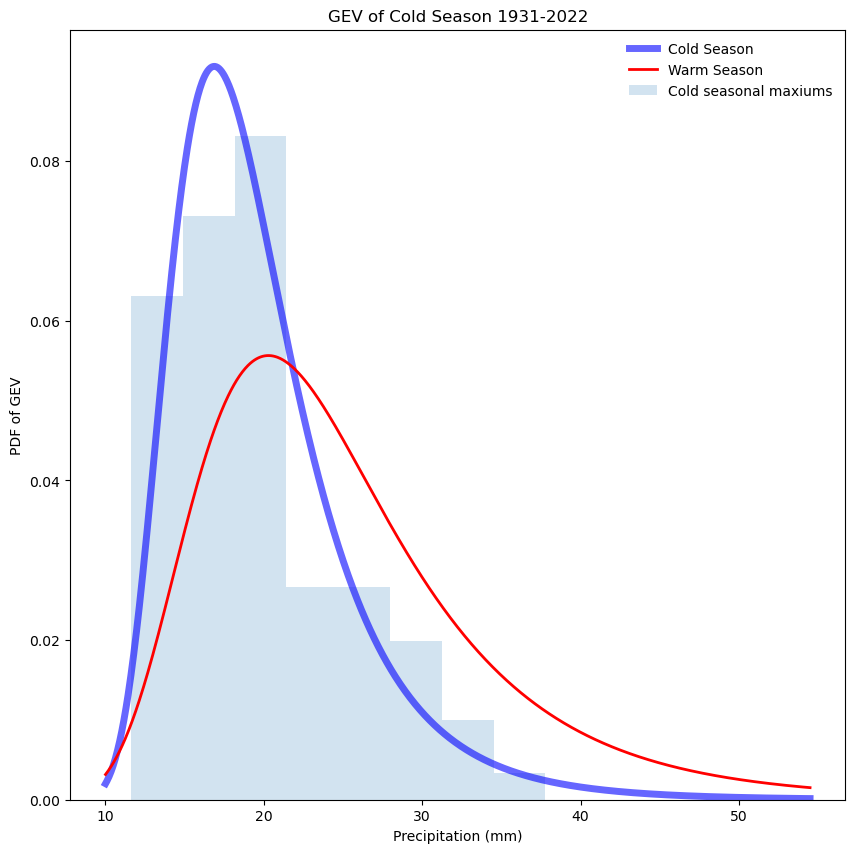

In [38]:
# Just creating a figure and an axis/subplot

fig, ax = plt.subplots(1, 1, figsize=(10,10))

c = -0.08285125122421441
loc = 20.81378723824649
scale = 6.633494518370981

c_cold = -0.08177894286052442
loc_cold = 17.18329097712157
scale_cold = 4.017469082366661

# Section 1: This is just putting in the shape parameter and finding out the variance, mean, skew and 

mean, var, skew, kurt = genextreme.stats(c_cold,loc_cold,scale_cold, moments='mvsk')

#print(mean)
#print(var)
#print(skew)
#print(kurt)

# Section 2: Display the probability density function (pdf) however uses x as the ppf of our extreme value distrubtion.
# The ppf is the probability point function, the inverse of the cdf where everthing thing left of that point is equal to y
# Presumably they use this instead as a line created from a certain range as is better desribe the shape of the GEV function
# As such I will stick too it

x = np.linspace(genextreme.ppf(0.001, c_cold,loc_cold,scale_cold),
                genextreme.ppf(0.999, c_cold,loc_cold,scale_cold), 1000)
ax.plot(x, genextreme.pdf(x, c_cold,loc_cold,scale_cold),
       'blue', lw=5, alpha=0.6, label='Cold Season')

# Section 3: Freeze the distribution and display the frozen pdf this is creating another pdf
# A pdf of the warm seasons to show the differences between them 

rv = genextreme(c,loc,scale)
ax.plot(x, rv.pdf(x), 'red', lw=2, label='Warm Season')

# Section 4: Check accuracy of cdf and ppf and that they do infact equal each other's inverse 
# The main function is np.allclose which checks if two arrays are simlair element wise 

vals = genextreme.ppf([0.001, 0.5, 0.999], c_cold,loc_cold,scale_cold)
np.allclose([0.001, 0.5, 0.999], genextreme.cdf(vals, c_cold,loc_cold,scale_cold))
True

# Section 5: Inputing histogram data 

r2 = maxiums_cold

# Section 6: And compare the histogram:

ax.hist(r2, density=True, bins='auto', histtype='stepfilled', alpha=0.2, label='Cold seasonal maxiums')
ax.set_xlabel('Precipitation (mm)')
ax.set_ylabel('PDF of GEV')
ax.legend(loc='best', frameon=False)
ax.set_title('GEV of Cold Season 1931-2022')
plt.savefig("GEV of Cold Season 1931-2022")
plt.show()

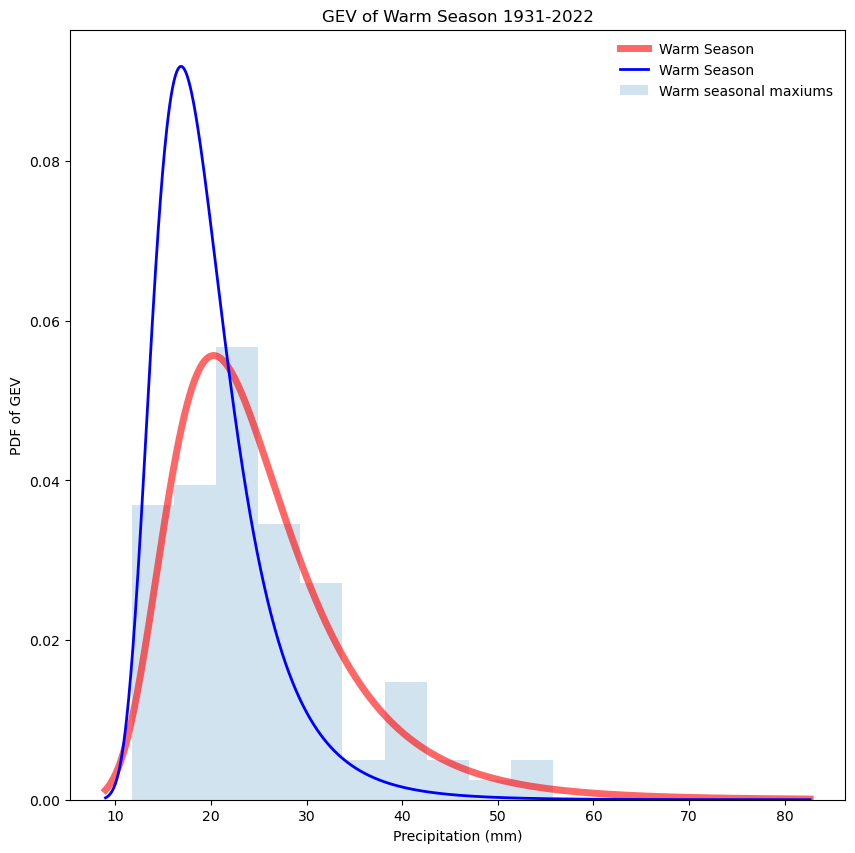

In [39]:
# Just creating a figure and an axis/subplot

fig, ax = plt.subplots(1, 1, figsize=(10,10))

c = -0.08285125122421441
loc = 20.81378723824649
scale = 6.633494518370981

c_cold = -0.08177894286052442
loc_cold = 17.18329097712157
scale_cold = 4.017469082366661


# Section 2: Display the probability density function (pdf) however uses x as the ppf which makes sense (see above)

x = np.linspace(genextreme.ppf(0.001, c,loc,scale),
                genextreme.ppf(0.999, c,loc,scale), 1000)
ax.plot(x, genextreme.pdf(x, c, loc, scale),
       'red', lw=5, alpha=0.6, label='Warm Season')

# Section 3: Freeze the distribution and display the frozen pdf:

rv = genextreme(c_cold,loc_cold,scale_cold)
ax.plot(x, rv.pdf(x), 'blue', lw=2, label='Warm Season')

# Section 5: Inputing histogram data 


r2 = maxiums_warm

# Section 6: And compare the histogram:

ax.hist(r2, density=True, bins='auto', histtype='stepfilled', alpha=0.2, label= 'Warm seasonal maxiums')
ax.set_xlabel('Precipitation (mm)')
ax.set_ylabel('PDF of GEV')
ax.legend(loc='best', frameon=False)
ax.set_title('GEV of Warm Season 1931-2022')
plt.savefig("GEV of Warm Season 1931-2022")
plt.show()

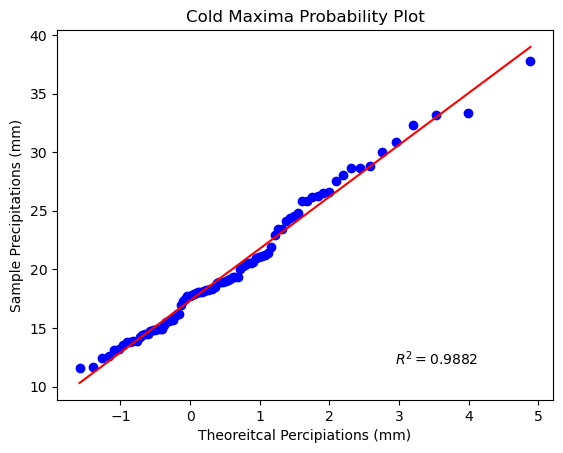

In [40]:
measurements = maxiums_cold
fig = stats.probplot(measurements, dist="gumbel_r", plot=pylab, rvalue = True)
plt.title("Cold Maxima Probability Plot")
plt.ylabel("Sample Precipitations (mm)")
plt.xlabel("Theoreitcal Percipiations (mm)")
plt.savefig("Cold Maxima Probability Plot 1931-2022")
plt.show()

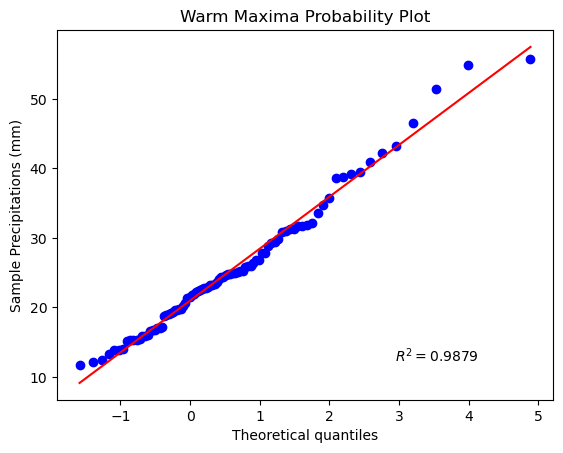

In [41]:
measurements = maxiums_warm
fig = stats.probplot(measurements, dist="gumbel_r", plot=pylab, rvalue = True)
plt.title("Warm Maxima Probability Plot")
plt.ylabel("Sample Precipitations (mm)")
plt.savefig("Warm Maxima Probability Plot 1931-2022")
plt.show()

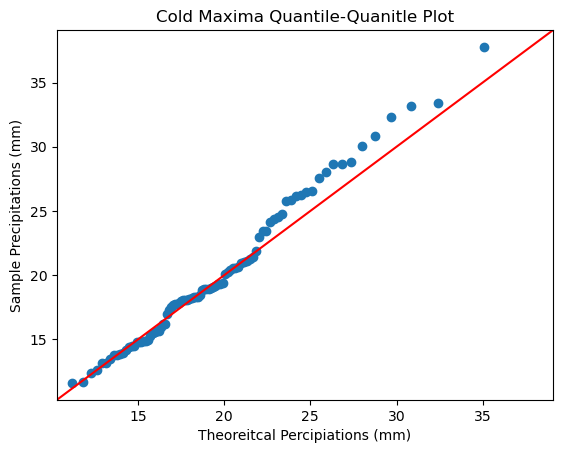

In [42]:
quantile_cold = np.array(maxiums_cold)

fig = sm.qqplot(quantile_cold, stats.gumbel_r, a = -0.08177894286052442, loc = 17.18329097712157, scale = 4.017469082366661
, line = "45")
plt.title("Cold Maxima Quantile-Quanitle Plot")
plt.ylabel("Sample Precipitations (mm)")
plt.xlabel("Theoreitcal Percipiations (mm)")
plt.savefig("Cold Maxima Quantile-Quanitle 1931-2022")
plt.show()

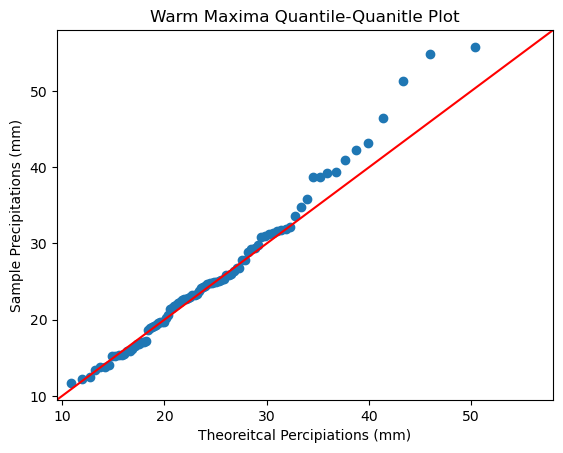

In [43]:
quantile_warm = np.array(maxiums_warm)

fig = sm.qqplot(quantile_warm, stats.gumbel_r, a = -0.08285125122421441
, loc = 20.81378723824649
, scale = 6.633494518370981 , line = "45")
plt.title("Warm Maxima Quantile-Quanitle Plot")
plt.ylabel("Sample Precipitations (mm)")
plt.xlabel("Theoreitcal Percipiations (mm)")
plt.savefig(" Maxima Quantile-Quanitle 1931-2022")
plt.show()

In [44]:
data = quantile_warm 

# Fit the generalized extreme value distribution to the data.
shape, loc, scale = genextreme.fit(data)
print("Fit parameters:")
print(f"  shape: {shape:.4f}")
print(f"  loc:   {loc:.4f}")
print(f"  scale: {scale:.4f}")
print()

# Compute the return levels for several return periods.
return_periods = np.array([5, 10, 20, 50, 100,500,1000])
return_levels = genextreme.isf(1/return_periods, shape, loc, scale)

print("Return levels:")
print()
print("Period    Precipitaiton")
print("(years)   (mm)")

for period, level in zip(return_periods, return_levels):
    print(f'{period:4.0f}  {level:9.2f}')

Fit parameters:
  shape: -0.0829
  loc:   20.8138
  scale: 6.6335

Return levels:

Period    Precipitaiton
(years)   (mm)
   5      31.41
  10      37.22
  20      43.15
  50      51.37
 100      57.96
 500      74.72
1000      82.65


In [45]:
data = quantile_cold

# Fit the generalized extreme value distribution to the data.
shape, loc, scale = genextreme.fit(data)
print("Fit parameters:")
print(f"  shape: {shape:.4f}")
print(f"  loc:   {loc:.4f}")
print(f"  scale: {scale:.4f}")
print()

# Compute the return levels for several return periods.
return_periods = np.array([5, 10, 20, 50, 100,500,1000])
return_levels = genextreme.isf(1/return_periods, shape, loc, scale)

print("Return levels:")
print()
print("Period    Precipitaiton")
print("(years)   (mm)")

for period, level in zip(return_periods, return_levels):
    print(f'{period:4.0f}  {level:9.2f}')

Fit parameters:
  shape: -0.0818
  loc:   17.1833
  scale: 4.0175

Return levels:

Period    Precipitaiton
(years)   (mm)
   5      23.59
  10      27.11
  20      30.69
  50      35.65
 100      39.62
 500      49.71
1000      54.48


## Question 7

Finding the return periods for 1931-1976 in cold and warm seasons and for 1977-2022 for cold and warm seasons, to then put on a map and show the changes. Allowing people to see the sub regions

In [48]:
# Trying to see how two 45 years compare from the different seasons (cold)

First_45_cold = maxiums_cold [0:46]
Second_45_cold = maxiums_cold [46:92]

# Trying to see how two 45 years compare from the different seasons (warm) 

First_45_warm = maxiums_warm [0:46]
Second_45_warm = maxiums_warm [46:92]

In [54]:
# Trying to see how two 45 years compare from the different seasons (cold)

First_45_cold = maxiums_cold [0:46]
Second_45_cold = maxiums_cold [46:92]

# Trying to see how two 45 years compare from the different seasons (warm) 

First_45_warm = maxiums_warm [0:46]
Second_45_warm = maxiums_warm [46:92]

data = First_45_cold

# Fit the generalized extreme value distribution to the data.
shape, loc, scale = genextreme.fit(data)
print("Fit parameters:")
print(f"  shape: {shape:.4f}")
print(f"  loc:   {loc:.4f}")
print(f"  scale: {scale:.4f}")
print()

# Compute the return levels for several return periods.
return_periods = np.array([5, 10, 20, 50, 100,500,1000])
return_levels = genextreme.isf(1/return_periods, shape, loc, scale)

print("First_45_cold")
print()
print("Period    Precipitaiton")
print("(years)   (mm)")

for period, level in zip(return_periods, return_levels):
    print(f'  {level:9.2f}')


data = Second_45_cold

# Fit the generalized extreme value distribution to the data.
shape, loc, scale = genextreme.fit(data)
print("Fit parameters:")
print(f"  shape: {shape:.4f}")
print(f"  loc:   {loc:.4f}")
print(f"  scale: {scale:.4f}")
print()

# Compute the return levels for several return periods.
return_periods = np.array([5, 10, 20, 50, 100,500,1000])
return_levels = genextreme.isf(1/return_periods, shape, loc, scale)

print("Second_45_cold:")
print()
print("Period    Precipitaiton")
print("(years)   (mm)")

for period, level in zip(return_periods, return_levels):
    print(f' {level:9.2f}')


data = First_45_warm

# Fit the generalized extreme value distribution to the data.
shape, loc, scale = genextreme.fit(data)
print("Fit parameters:")
print(f"  shape: {shape:.4f}")
print(f"  loc:   {loc:.4f}")
print(f"  scale: {scale:.4f}")
print()

# Compute the return levels for several return periods.
return_periods = np.array([5, 10, 20, 50, 100,500,1000])
return_levels = genextreme.isf(1/return_periods, shape, loc, scale)

print("First_45_warm:")
print()
print("Period    Precipitaiton")
print("(years)   (mm)")

for period, level in zip(return_periods, return_levels):
    print(f' {level:9.2f}')



data = Second_45_warm

# Fit the generalized extreme value distribution to the data.
shape, loc, scale = genextreme.fit(data)
print("Fit parameters:")
print(f"  shape: {shape:.4f}")
print(f"  loc:   {loc:.4f}")
print(f"  scale: {scale:.4f}")
print()

# Compute the return levels for several return periods.
return_periods = np.array([5, 10, 20, 50, 100,500,1000])
return_levels = genextreme.isf(1/return_periods, shape, loc, scale)

print("Second_45_warm:")
print()
print("Period    Precipitaiton")
print("(years)   (mm)")

for period, level in zip(return_periods, return_levels):
    print(f' {level:9.2f}')
    
data = maxiums_cold

# Fit the generalized extreme value distribution to the data.
shape, loc, scale = genextreme.fit(data)
print("Fit parameters:")
print(f"  shape: {shape:.4f}")
print(f"  loc:   {loc:.4f}")
print(f"  scale: {scale:.4f}")
print()

# Compute the return levels for several return periods.
return_periods = np.array([5, 10, 20, 50, 100,500,1000])
return_levels = genextreme.isf(1/return_periods, shape, loc, scale)

print("maxiums_cold:")
print()
print("Period    Precipitaiton")
print("(years)   (mm)")

for period, level in zip(return_periods, return_levels):
    print(f' {level:9.2f}')
    
data = maxiums_warm

# Fit the generalized extreme value distribution to the data.
shape, loc, scale = genextreme.fit(data)
print("Fit parameters:")
print(f"  shape: {shape:.4f}")
print(f"  loc:   {loc:.4f}")
print(f"  scale: {scale:.4f}")
print()

# Compute the return levels for several return periods.
return_periods = np.array([5, 10, 20, 50, 100,500,1000])
return_levels = genextreme.isf(1/return_periods, shape, loc, scale)

print("maxiums_warm:")

for period, level in zip(return_periods, return_levels):
    print(f' {level:9.2f}')

Fit parameters:
  shape: -0.1394
  loc:   16.1118
  scale: 3.5574

First_45_cold

Period    Precipitaiton
(years)   (mm)
      22.05
      25.51
      29.20
      34.56
      39.05
      51.27
      57.43
Fit parameters:
  shape: -0.0251
  loc:   18.4166
  scale: 4.2523

Second_45_cold:

Period    Precipitaiton
(years)   (mm)
     24.92
     28.26
     31.53
     35.85
     39.15
     47.01
     50.49
Fit parameters:
  shape: -0.0025
  loc:   20.3430
  scale: 6.4842

First_45_warm:

Period    Precipitaiton
(years)   (mm)
     30.09
     34.98
     39.67
     45.77
     50.34
     60.94
     65.52
Fit parameters:
  shape: -0.1653
  loc:   21.3021
  scale: 6.6437

Second_45_warm:

Period    Precipitaiton
(years)   (mm)
     32.61
     39.41
     46.78
     57.72
     67.09
     93.37
    107.01
Fit parameters:
  shape: -0.0818
  loc:   17.1833
  scale: 4.0175

maxiums_cold:

Period    Precipitaiton
(years)   (mm)
     23.59
     27.11
     30.69
     35.65
     39.62
     49.71
     54.4

In [ ]:
#Return Periods for graphs 

